In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
titles = pd.read_csv(r".\dataset\titles.csv")
credits = pd.read_csv(r".\dataset\credits.csv")

## "Titles" data frame

In [5]:
# Get the number of rows and columns in the "titles" data frame
print("Number of rows (instances): ", titles.shape[0])
print("Number of columns (attributes): ", titles.shape[1])

Number of rows (instances):  2825
Number of columns (attributes):  15


In [6]:
# Will show the first few rows of the data frame
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,NaN,197,"['history', 'drama']",['US'],NaN,tt0006864,7.7,15242.0,9.412,7.2


### About the dataset: Instances and Attributes

This dataset contains 2825 unique titles on Paramount with 15 columns containing their information, including:

- id: The title ID on JustWatch.
- title: The name of the title.
- show_type: TV show or movie.
- description: A brief description.
- release_year: The release year.
- age_certification: The age certification.
- runtime: The length of the episode (SHOW) or movie.
- genres: A list of genres.
- production_countries: A list of countries that produced the title.
- seasons: Number of seasons if it's a SHOW.
- imdb_id: The title ID on IMDB.
- imdb_score: Score on IMDB.
- imdb_votes: Votes on IMDB.
- tmdb_popularity: Popularity on TMDB.
- tmdb_score: Score on TMDB.

In [8]:
# Getting the information about the DataFrame, including column names, data types, and non-null counts
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2825 non-null   object 
 1   title                 2825 non-null   object 
 2   type                  2825 non-null   object 
 3   description           2812 non-null   object 
 4   release_year          2825 non-null   int64  
 5   age_certification     1302 non-null   object 
 6   runtime               2825 non-null   int64  
 7   genres                2825 non-null   object 
 8   production_countries  2825 non-null   object 
 9   seasons               626 non-null    float64
 10  imdb_id               2666 non-null   object 
 11  imdb_score            2613 non-null   float64
 12  imdb_votes            2613 non-null   float64
 13  tmdb_popularity       2768 non-null   float64
 14  tmdb_score            2337 non-null   float64
dtypes: float64(5), int64(

### Data Analysis

In [9]:
# Checking unique values in numerical columns

print("All of the release years:\n", np.sort(titles['release_year'].unique()))
print("Number of release years:\n", titles['release_year'].unique().size)


All of the release years:
 [1912 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926
 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Number of release years:
 110


In [10]:
print("All of the possible season lengths:\n", np.sort(titles['seasons'].unique()))
print("Number of possible season lengths:\n", titles['seasons'].unique().size)

All of the possible season lengths:
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 19.
 20. 21. 22. 23. 26. 27. 33. 34. 37. 42. 45. 49. nan]
Number of possible season lengths:
 31


In [11]:
# We can check what the mean, median and mode are for 
# - imdb_score
# - imdb_votes
# - tmdb_popularity
# - tmdb_score 
# are 

# I took this code from chatGPT by asking it to help me turn a bunch of print commands into a table 

statistics = {
    'Attribute': ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
    'Mean': [titles['imdb_score'].mean(), titles['imdb_votes'].mean(), titles['tmdb_popularity'].mean(), titles['tmdb_score'].mean()],
    'Median': [titles['imdb_score'].median(), titles['imdb_votes'].median(), titles['tmdb_popularity'].median(), titles['tmdb_score'].median()],
    'Mode': [titles['imdb_score'].mode()[0], titles['imdb_votes'].mode()[0], titles['tmdb_popularity'].mode()[0], titles['tmdb_score'].mode()[0]]
}

df = pd.DataFrame(statistics)
df

,Attribute,Mean,Median,Mode
0,imdb_score,6.042863,6.1000,5.6
1,imdb_votes,22238.755454,548.0000,10.0
2,tmdb_popularity,13.043838,2.6205,0.6
3,tmdb_score,6.045528,6.1000,6.0


In [12]:
# Checking the correlation between imdb_score and tmdb_score
correlation = titles[['imdb_score', 'tmdb_score']].corr()
print("Correlation between imdb_score and tmdb_score: ")
correlation

Correlation between imdb_score and tmdb_score: 


,imdb_score,tmdb_score
imdb_score,1.000000,0.582808
tmdb_score,0.582808,1.000000


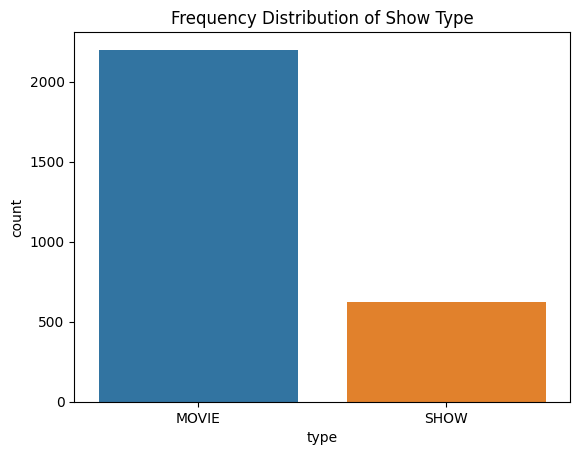

In [13]:
# Frequency distribution of show type
sns.countplot(x='type', data=titles)
plt.title('Frequency Distribution of Show Type')
plt.show()

In [36]:
# Here we can see that there are a lot more movies than there are shows in this data set.

In [14]:
# How many movies/shows of a certain age certification are there?
cross_tab = pd.crosstab(titles['type'], titles['age_certification'])
cross_tab

age_certification,G,NC-17,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7
type,,,,,,,,,,,
MOVIE,90,3,147,180,321,0,0,0,0,0,0
SHOW,0,0,0,0,0,165,95,56,143,50,52


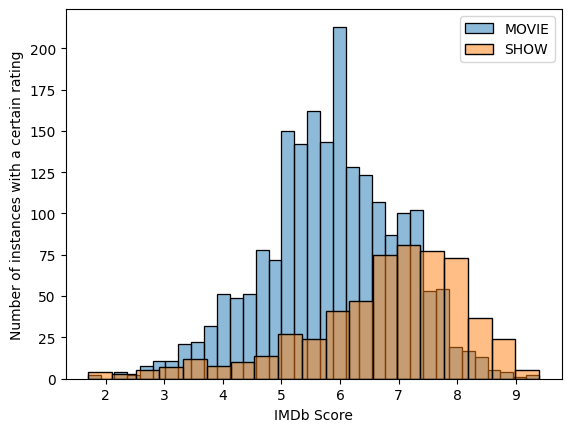

In [15]:
# Comparing the ratings of movies and shows

# Filter the data for "MOVIE" and "SHOW" types
movies = titles[titles['type'] == 'MOVIE']
shows = titles[titles['type'] == 'SHOW']

# Create a histogram plot for movie ratings
sns.histplot(data=movies, x='imdb_score', label='MOVIE', alpha=0.5)

# Create a histogram plot for show ratings
sns.histplot(data=shows, x='imdb_score', label='SHOW', alpha=0.5)

# Set labels and legend
plt.xlabel('IMDb Score')
plt.ylabel('Number of instances with a certain rating')
plt.legend()

In [37]:
# We can see that the shows are generally rated better than the movies (despite there being significantly less shows compared 
# to the number of movies, there are more shows rated with 7.5 - 9.5)

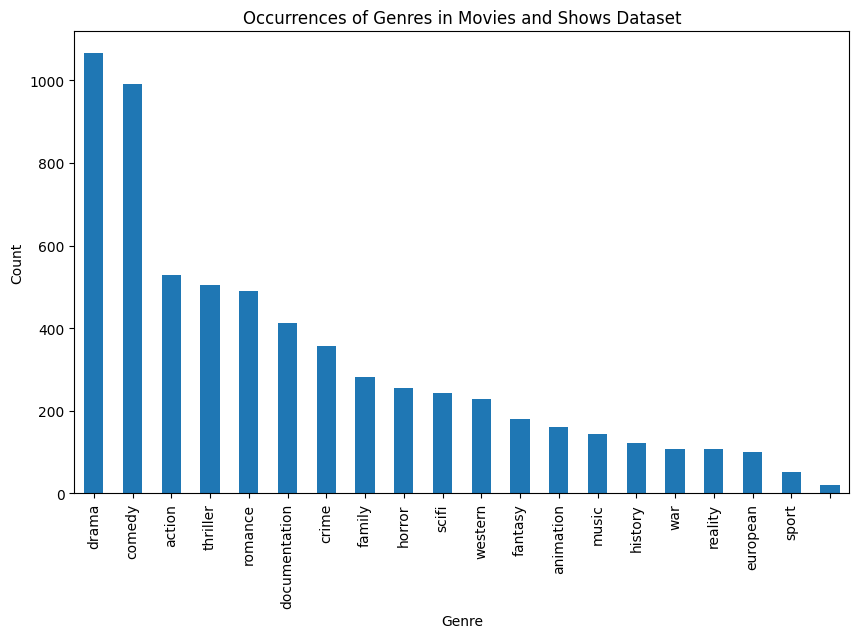

In [105]:
# What genres are the most common in the dataset?

genres = titles['genres']
genres_split = genres.str.split(',')
    
genres_cleaned = []
for genre_list in genres_split:
    cleaned_genres = [genre.replace("'", "").replace("[", "").replace("]", "").replace(" ", "") for genre in genre_list]
    genres_cleaned.append(cleaned_genres)

all_genres = []
for genre in genres_cleaned:
    for g in genre:
         all_genres.append(g)

# for g in all_genres:
#     print(g)

all_genres_series = pd.Series(all_genres)
genre_counts = all_genres_series.value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Occurrences of Genres in Movies and Shows Dataset')
plt.show()

### Data Cleanup

In [16]:
titles.isna().sum()

id                         0
title                      0
type                       0
description               13
release_year               0
age_certification       1523
runtime                    0
genres                     0
production_countries       0
seasons                 2199
imdb_id                  159
imdb_score               212
imdb_votes               212
tmdb_popularity           57
tmdb_score               488
dtype: int64

In [17]:
# Checking which show types exist so that we can see whether there are any TV shows without a number of seasons 
# or if it's just movies (which naturally don't have seasons) 
show_types = set(titles.type)
show_types

{'MOVIE', 'SHOW'}

In [18]:
# we conclude that the only instances without seasons are movies
tv_show_with_missing_seasons = titles[(titles['type'] == 'SHOW') & titles['seasons'].isnull()]
tv_show_with_missing_seasons

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [19]:
# We simply set the number of seasons for movies to 0 - since movies don't have any seasons.
titles.loc[titles["seasons"].isna(), "seasons"] = 0.0

In [20]:
titles.isna().sum()

id                         0
title                      0
type                       0
description               13
release_year               0
age_certification       1523
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  159
imdb_score               212
imdb_votes               212
tmdb_popularity           57
tmdb_score               488
dtype: int64

In [21]:
# The age certification column is not that interesting to us - we can drop it.
titles = titles.drop(columns=["age_certification"])

In [22]:
# We can also drop the instances without an imdb_id, since there are not a lot of them.
titles = titles.dropna(subset=["imdb_id"])

In [23]:
# There are only 13 movies without description so we can just drop those instances
titles = titles.dropna(subset=["description"])

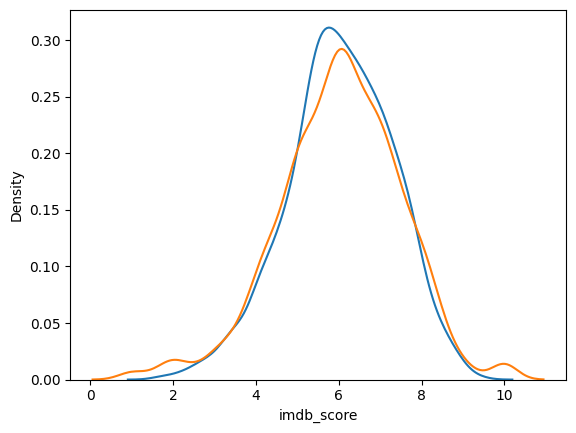

In [24]:
# We want to compare the IMDB score with the TMDB score and see if there are 
#significant differences between them:

g1 = sns.kdeplot(data = titles, x = 'imdb_score')
g2 = sns.kdeplot(data = titles, x = 'tmdb_score')


In [25]:
# The distributions are similar. 
# We have also previously noticed that the correlation between imdb_score and tmdb_score is moderately
# strong as well (~0.6)
#Let's see if there are any instances that have a TMDB score,
# that don't have an IMDB score

has_tmdb_no_imdb = titles[(titles['imdb_score'].isnull()) & (titles['tmdb_score'])]
has_tmdb_no_imdb

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
891,tm112348,Rock 'n' Roll Revue,MOVIE,Rock'n Roll Revue is a 1955 American film dire...,1955,69,['music'],['US'],0.0,tt9214742,NaN,NaN,1.491,3.0
1307,ts645,Comedy Central Roast,SHOW,The Comedy Central Roasts are a series of cele...,2003,66,['comedy'],['US'],1.0,tt15561558,NaN,NaN,4.180,6.4
1804,tm600139,40 Under 40,MOVIE,"Crochet sculptures, a gun embedded in a teapot...",2013,52,['documentation'],['US'],0.0,tt2759766,NaN,NaN,0.600,8.0
2074,tm213337,Islands of Creation,MOVIE,"In the jungles of the Solomon Islands, a remot...",2015,46,['documentation'],"['SB', 'US']",0.0,tt15280380,NaN,NaN,0.600,6.5
2358,ts57114,America's Secret Space Heroes,SHOW,The inside stories of how the unknown engineer...,2017,44,['documentation'],['US'],1.0,tt18936622,NaN,NaN,1.175,7.0
2429,ts77678,Love & Hip Hop Miami,SHOW,"Follow the young, hip-hop elite as they strive...",2018,42,['reality'],['US'],4.0,tt8042954,NaN,NaN,3.865,9.1
2443,tm900898,Kings of the Desert,MOVIE,""" What counts is the journey not the destinati...",2017,55,"['sport', 'action']",['FR'],0.0,tt12245952,NaN,NaN,0.600,8.0


In [26]:
# We can assign those TMDB scores to the corresponding IMDB scores and drop the TMDB column, 
# since we don't need two similar scores.

titles.loc[titles["imdb_score"].isna(), "imdb_score"] = titles["tmdb_score"]
titles = titles.drop(columns=["tmdb_score"])

In [27]:
# We can fill out the remaining missing values with mean
titles['imdb_score'].fillna(titles['imdb_score'].mean(), inplace=True)
titles['imdb_votes'].fillna(titles['imdb_votes'].mean(), inplace=True)
titles['tmdb_popularity'].fillna(titles['tmdb_popularity'].mean(), inplace=True)

## "Credits" data frame

In [29]:
# Get the number of rows and columns in the "credits" data frame
print("Number of rows (instances): ", credits.shape[0])
print("Number of columns (attributes): ", credits.shape[1])

Number of rows (instances):  39842
Number of columns (attributes):  5


In [31]:
# Will show the first few rows of the data frame
credits.head()

,person_id,id,name,character,role
0,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
1,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
2,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR
3,28715,tm19248,Jim Farley,General Thatcher,ACTOR
4,27348,tm19248,Frederick Vroom,A Southern General,ACTOR


### About the data set: instances and attributes
This data set contains 39842 credits of actors and directors on Paramount titles with 5 columns containing their information, including:

- person_ID: The person ID on JustWatch.
- id: The title ID on JustWatch.
- name: The actor or director's name.
- character_name: The character name.
- role: ACTOR or DIRECTOR.

In [32]:
# Getting the information about the DataFrame, including column names, data types, and non-null counts
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39842 entries, 0 to 39841
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  39842 non-null  int64 
 1   id         39842 non-null  object
 2   name       39842 non-null  object
 3   character  36729 non-null  object
 4   role       39842 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


### Data Analysis

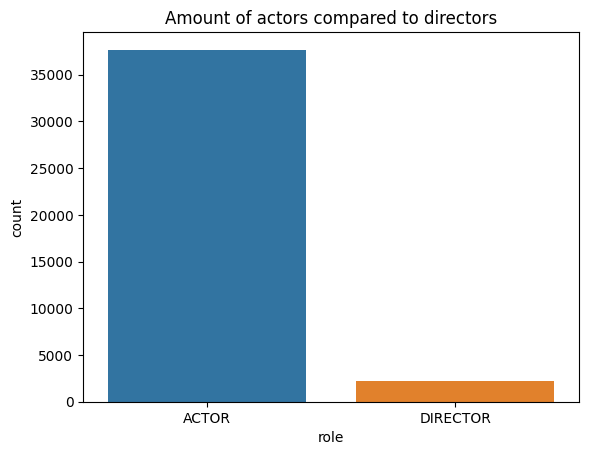

In [35]:
# How many of actors are there compared to directors?
sns.countplot(x='role', data=credits)
plt.title('Amount of actors compared to directors')
plt.show()

In [38]:
# We can see that there are a lot more actors than there are directors - this makes sense, since most movies have multiple
# actors, while there's usually one director

In [45]:
# Let's check which directors worked with the most actors

# Filter for directors
directors_data = credits[credits['role'] == 'DIRECTOR']

# Group directors data by 'name_director' and count unique actors
directors_with_most_actors = directors_data.groupby('name')['name'].count().reset_index(name='num_actors')

# Sort directors by number of actors in descending order
directors_with_most_actors = directors_with_most_actors.sort_values(by='num_actors', ascending=False)

# Display the directors with the most actors
print("Directors with the most actors:")
directors_with_most_actors.head()

Directors with the most actors:


,name,num_actors
791,Joseph Kane,25
1326,Sam Newfield,20
1315,Ryan Polito,19
1263,Robert N. Bradbury,14
717,Joel Gallen,13


In [49]:
# Let's do the same thing with actors that worked with most directors:

# Filter for actors
actors_data = credits[credits['role'] == 'ACTOR']

# Group directors data by 'name_actor' and count unique directors
actors_with_most_directors = actors_data.groupby('name')['name'].count().reset_index(name='num_directors')

# Sort actors by number of directors in descending order
actors_with_most_directors = actors_with_most_directors.sort_values(by='num_directors', ascending=False)

# Display the actors with the most directors
print("Actors with the most directors:")
actors_with_most_directors.head()

Actors with the most directors:


,name,num_directors
8770,George 'Gabby' Hayes,30
13061,John Wayne,26
22128,Roy Rogers,25
6919,Earl Dwire,25
8127,Forrest Taylor,21


In [106]:
# Let's see the top actors and directors based on the number of movies they directed/starred in

merged_datasets = pd.merge(titles, credits, on='id')
most_popular_actors_directors = merged_datasets.groupby('name').agg({'id': 'count'}).reset_index()

most_popular_actors_directors = most_popular_actors_directors.sort_values(by='id', ascending=False)

most_popular_actors_directors.columns = ['Actor/Director Name', 'Number of Titles']
most_popular_actors_directors.head()

,Actor/Director Name,Number of Titles
9033,George 'Gabby' Hayes,29
13505,John Wayne,26
7126,Earl Dwire,25
13831,Joseph Kane,25
22888,Roy Rogers,25


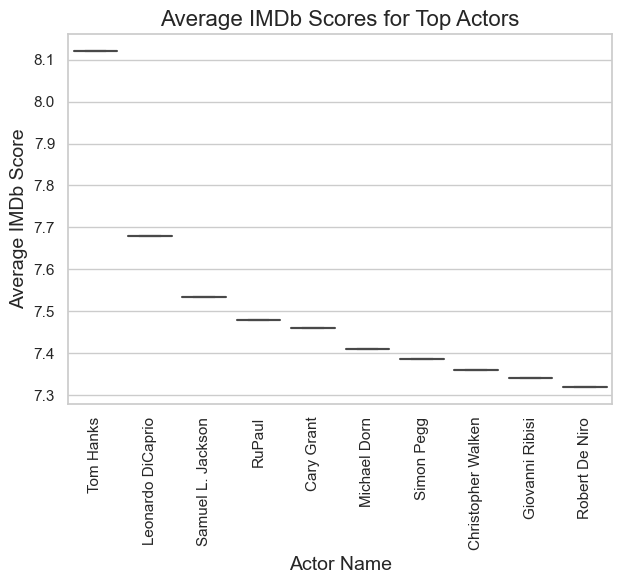

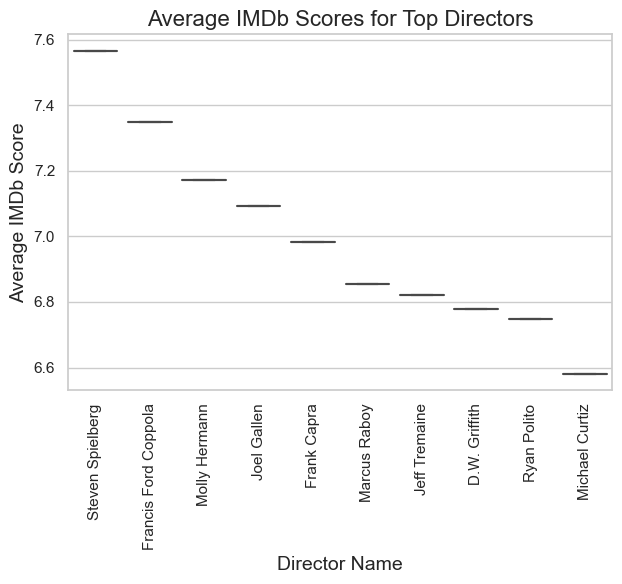

In [126]:
# We could check who the best actors or directors are based on their imdb average score 

# Actors
# we use .filter(lambda x: len(x) >= 5) because I decided that that should be the minimum amount titles it takes to rate an actor
top_actors = merged_datasets[merged_datasets['role'] == 'ACTOR'].groupby('name').filter(lambda x: len(x) >= 5)
avg_imdb_scores_actors = top_actors.groupby('name')['imdb_score'].mean().reset_index()

top_10_imdb_score_actors = avg_imdb_scores_actors.sort_values(by='imdb_score', ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='name', y='imdb_score', data=top_10_imdb_score_actors)
plt.title('Average IMDb Scores for Top Actors', fontsize=16)
plt.xlabel('Actor Name', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()


# Directors
top_directors = merged_datasets[merged_datasets['role'] == 'DIRECTOR'].groupby('name').filter(lambda x: len(x) >= 5)
avg_imdb_scores_directors = top_directors.groupby('name')['imdb_score'].mean().reset_index()

top_10_imdb_score_directors = avg_imdb_scores_directors.sort_values(by='imdb_score', ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='name', y='imdb_score', data=top_10_imdb_score_directors)
plt.title('Average IMDb Scores for Top Directors', fontsize=16)
plt.xlabel('Director Name', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
